# **Arithmetic Operations**

In [ ]:
import torch
import numpy as np

In [ ]:
a = torch.tensor([1,2,3,4])
b = torch.tensor([5,6,7,8])

In [ ]:
# Addition
a+b
torch.add(a, b)
a.add(b)

tensor([ 6,  8, 10, 12])

In [ ]:
a = a+b
a

tensor([ 6,  8, 10, 12])

In [ ]:
a.add_(b)
a.add_(b)
a

tensor([16, 20, 24, 28])

In [ ]:
b

tensor([5, 6, 7, 8])

In [ ]:
a = torch.tensor([1,2,3,4])
b = torch.tensor([5,36,17,8])
#Subtraction
# b-a
# torch.sub(a, b)
# b.sub(a)
b.sub_(a)
b

tensor([ 4, 34, 14,  4])

In [ ]:
#Multiplication
a = torch.tensor([1,2,3,4])
b = torch.tensor([5,6,7,8])
# a*b
# torch.mul(a, b)
# a.mul(b)
b.mul_(a)
b

tensor([ 5, 12, 21, 32])

In [ ]:
#Division
a = torch.tensor([1,2,3,4])
b = torch.tensor([5,6,7,8], dtype=torch.float32)
# a/b
# torch.div(a, b)
# b.div(a)
b.div_(a)
b

tensor([5.0000, 3.0000, 2.3333, 2.0000])

In [ ]:
#Power/Exp
a = torch.tensor([1,2,3,4])
b = torch.tensor([5,6,7,8])
a**b
# torch.pow(a, b)
# a.pow(b)
# b.pow_(a)
# b

tensor([    1,    64,  2187, 65536])

In [ ]:
#Remainder
a = torch.tensor([1,2,3,4])
b = torch.tensor([5,6,7,8])
a%b
# torch.remainder(a, b)
# a.remainder(b)
# b.remainder_(a)
# b

tensor([1, 2, 3, 4])

# **Tensor Ops**

In [ ]:
torch.zeros(2,5,3)

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

In [ ]:
ones = torch.ones(2,4)
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
ones.size()

torch.Size([2, 4])

In [ ]:
ones.dtype

torch.float32

In [ ]:
2**32

4294967296

In [ ]:
large_ones = torch.ones(2,3, dtype=torch.float64)
large_ones

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [ ]:
torch.rand(2,3)

tensor([[0.6429, 0.9708, 0.1673],
        [0.8610, 0.7731, 0.9792]])

In [ ]:
torch.randint(5, 10, (5,3))

tensor([[6, 5, 8],
        [7, 6, 6],
        [5, 5, 7],
        [9, 9, 9],
        [7, 9, 7]])

In [ ]:
t = torch.randint(5, 10, (4,4))
t

tensor([[5, 8, 5, 8],
        [7, 5, 9, 6],
        [5, 9, 8, 8],
        [9, 7, 7, 5]])

In [ ]:
t.reshape(2,4,2)

tensor([[[5, 8],
         [5, 8],
         [7, 5],
         [9, 6]],

        [[5, 9],
         [8, 8],
         [9, 7],
         [7, 5]]])

In [ ]:
t.view(2,4,2)

tensor([[[5, 8],
         [5, 8],
         [7, 5],
         [9, 6]],

        [[5, 9],
         [8, 8],
         [9, 7],
         [7, 5]]])

# **Auto-Grad**

In [ ]:
x = torch.randn(3, requires_grad=True)
y = x.mean()
print(x)
print(y)

tensor([ 1.9994, -1.8071, -0.1153], requires_grad=True)
tensor(0.0256, grad_fn=<MeanBackward0>)


In [ ]:
y.backward()
print(x.grad)

tensor([0.3333, 0.3333, 0.3333])


In [ ]:
z = (y**2).mean()
z.backward()
print(x.grad)

tensor([0.3504, 0.3504, 0.3504])


In [ ]:
x = torch.randn(3, requires_grad=True)
w = torch.randn(3, requires_grad=True)

y = (x*w).sum()

y.backward()
print(w)
print(w.grad)

tensor([-0.1204, -1.4839,  0.5621], requires_grad=True)
tensor([ 0.9954, -0.1786,  0.4063])


# **Detaching Gradiants**

In [ ]:
a = torch.randn(2,3)
print(a.requires_grad)
b = (a**2).sum()
print(b.grad_fn)

a.requires_grad_(True)
print(a.requires_grad)
b = (a**2).sum()
print(b.grad_fn)

# a.requires_grad_(False)
# print(a.requires_grad)

a = a.detach()
print(a.requires_grad)
b = (a**2).sum()
print(b.grad_fn)

False
None
True
False
None


In [ ]:
x = torch.randn(3, requires_grad=True)
w = torch.randn(3, requires_grad=True)

print("W before training:", w)

for epoch in range(5):
  output = (x*w).sum()

  output.backward()

  with torch.no_grad():
    w -= 0.1*w.grad
  print(w.grad)

  w.grad.zero_()

print("W after training:", w)

W before training: tensor([ 0.4460, -1.4801,  0.2089], requires_grad=True)
tensor([ 0.4772, -0.5658, -0.7503])
tensor([ 0.4772, -0.5658, -0.7503])
tensor([ 0.4772, -0.5658, -0.7503])
tensor([ 0.4772, -0.5658, -0.7503])
tensor([ 0.4772, -0.5658, -0.7503])
W after training: tensor([ 0.2074, -1.1972,  0.5841], requires_grad=True)


# **Basic Neural Network**

In [ ]:
import torch
import numpy as np

# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [85, 100, 60],
                   [95, 80, 55],
                   [105, 120, 75],
                   [78, 90, 50],
                   [82, 70, 45]], dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119],
                    [98, 110],
                    [88, 95],
                    [115, 140],
                    [76, 85],
                    [65, 75]], dtype='float32')

In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 85., 100.,  60.],
        [ 95.,  80.,  55.],
        [105., 120.,  75.],
        [ 78.,  90.,  50.],
        [ 82.,  70.,  45.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 98., 110.],
        [ 88.,  95.],
        [115., 140.],
        [ 76.,  85.],
        [ 65.,  75.]])


In [ ]:
w = torch.randn(3,2, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 0.1674,  0.2380],
        [ 0.8814, -0.4406],
        [ 0.9254,  0.4304]], requires_grad=True)
tensor([ 1.2801, -0.7225], requires_grad=True)


In [ ]:
# Defining Model
def model(x):
  # return (x @ w) + b
  return torch.matmul(x,w)+b

#MSE Loss function
def mse(p1, p2):
  diff = p1-p2
  return torch.sum(diff**2)/ diff.numel()

# Training step
for i in range(1000):
  preds = model(inputs)
  loss = mse(preds, targets)
  loss.backward()
  if i%100 == 99:
    print(loss.item())

  with torch.no_grad():
    w -= w.grad * 0.00001
    b -= b.grad * 0.00001
    w.grad.zero_()
    b.grad.zero_()

preds = model(inputs)
loss = mse(preds, targets)
print(loss)

167.897216796875
97.26914978027344
63.02490234375
46.403343200683594
38.319190979003906
34.37253952026367
32.43240737915039
31.466655731201172
30.975189208984375
30.71561050415039
tensor(30.7137, grad_fn=<DivBackward0>)


# **Basic Neural Network with Built-in functions**

> Using Pytorch



In [ ]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70],
                   [85, 100, 60],
                   [95, 80, 55],
                   [105, 120, 75],
                   [78, 90, 50],
                   [82, 70, 45]], dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119],
                    [98, 110],
                    [88, 95],
                    [115, 140],
                    [76, 85],
                    [65, 75]], dtype='float32')
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)


tensor_ds = TensorDataset(inputs, targets)
tensor_dl = DataLoader(tensor_ds, batch_size=5, shuffle=True)

next(iter(tensor_dl))

[tensor([[ 82.,  70.,  45.],
         [ 73.,  67.,  43.],
         [ 95.,  80.,  55.],
         [ 85., 100.,  60.],
         [105., 120.,  75.]]),
 tensor([[ 65.,  75.],
         [ 56.,  70.],
         [ 88.,  95.],
         [ 98., 110.],
         [115., 140.]])]

In [ ]:
#Replacing Model with built-in function
class SimpleNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(3, 4)
    self.act1 = nn.ReLU()
    self.linear2 = nn.Linear(4, 2)

  def forward(self, x):
    x = self.linear1(x)
    x = self.act1(x)
    x = self.linear2(x)
    return x

model = SimpleNN()
# for name, params in model.named_parameters():
#   print("Name:", name)
#   print("Param", params)


#Replacing MSE with built-in function
# mse = torch.nn.MSELoss()
mae = torch.nn.L1Loss()

#Optimizer
opt = torch.optim.Adam(model.parameters(), lr = 0.00001)

# Training step
def fit(num_epochs, model, loss_fn, opt):
  for epoch in range(num_epochs):
    preds = model(inputs)
    loss = loss_fn(preds, targets)

    loss.backward()
    if epoch%100 == 99:
      print(loss.item())

    opt.step()
    opt.zero_grad()


opt_SGD = torch.optim.SGD(model.parameters(), lr = 0.00001)

# Training step
def fit_SGD(num_epochs, model, loss_fn, opt):
  for epoch in range(num_epochs):
    for xb, yb in tensor_dl:
      preds = model(xb)
      loss = loss_fn(preds, yb)

      loss.backward()
      opt.step()
      opt.zero_grad()
    if epoch%100 == 99:
      print(loss.item())



# fit(1000, model, mae, opt)
fit_SGD(1000, model, mae, opt_SGD)
preds = model(inputs)
print(preds)

100.01762390136719
77.62542724609375
54.941322326660156
52.971649169921875
31.738414764404297
18.23800277709961
10.284299850463867
5.891592979431152
11.009353637695312
11.201951026916504
tensor([[ 68.4940,  77.4236],
        [ 89.5632, 100.9864],
        [112.8751, 128.3491],
        [ 59.5931,  74.8526],
        [ 87.0538,  99.1359],
        [ 94.4693, 105.2918],
        [ 84.3242,  96.4283],
        [114.9714, 127.8692],
        [ 85.1388,  94.5454],
        [ 73.1100,  83.3301]], grad_fn=<AddmmBackward0>)


# **Deep Neural Network for IRIS Dataset**

In [ ]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
iris_df = pd.read_csv(url)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Change last column from strings to integers
iris_df['species'] = iris_df['species'].replace('setosa', 0)
iris_df['species'] = iris_df['species'].replace('versicolor', 1)
iris_df['species'] = iris_df['species'].replace('virginica', 2)


X = iris_df.drop('species', axis=1).values
y = iris_df['species'].values

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41)

In [ ]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
X_train

tensor([[5.7000, 2.6000, 3.5000, 1.0000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [4.9000, 2.5000, 4.5000, 1.7000],
        [5.5000, 2.6000, 4.4000, 1.2000],
        [6.7000, 3.0000, 5.2000, 2.3000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [6.9000, 3.1000, 5.1000, 2.3000],
        [6.4000, 3.2000, 4.5000, 1.5000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [5.9000, 3.2000, 4.8000, 1.8000],
        [6.2000, 2.9000, 4.3000, 1.3000],
        [5.7000, 2.8000, 4.5000, 1.3000],
        [5.2000, 4.1000, 1.5000, 0.1000],
        [6.5000, 3.0000, 5.8000, 2.2000],
        [6.3000, 3.4000, 5.6000, 2.4000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [6.7000, 2.5000, 5.8000, 1.8000],
        [5.1000, 2.5000, 3.0000, 1.1000],
        [4.8000, 3.0000, 1.4000, 0.3000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [7.4000, 2.8000, 6.1000, 1.9000],
        [5.2000, 3.5000, 1.5000, 0

In [ ]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
train_ds = TensorDataset(X_train, y_train)
batch_size = 15
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
next(iter(train_dl))

[tensor([[7.1000, 3.0000, 5.9000, 2.1000],
         [5.1000, 3.8000, 1.6000, 0.2000],
         [7.2000, 3.0000, 5.8000, 1.6000],
         [5.4000, 3.9000, 1.3000, 0.4000],
         [7.9000, 3.8000, 6.4000, 2.0000],
         [6.6000, 2.9000, 4.6000, 1.3000],
         [5.7000, 4.4000, 1.5000, 0.4000],
         [5.1000, 2.5000, 3.0000, 1.1000],
         [6.0000, 2.9000, 4.5000, 1.5000],
         [6.7000, 3.1000, 4.7000, 1.5000],
         [4.4000, 3.2000, 1.3000, 0.2000],
         [5.4000, 3.7000, 1.5000, 0.2000],
         [6.8000, 2.8000, 4.8000, 1.4000],
         [7.2000, 3.2000, 6.0000, 1.8000],
         [4.6000, 3.1000, 1.5000, 0.2000]]),
 tensor([2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0])]

0.9880470633506775
0.7694223523139954
0.6692188382148743
0.7455676794052124
0.6409342288970947
0.6358434557914734
0.5680059790611267
0.5931703448295593
0.5441821217536926
0.46215203404426575


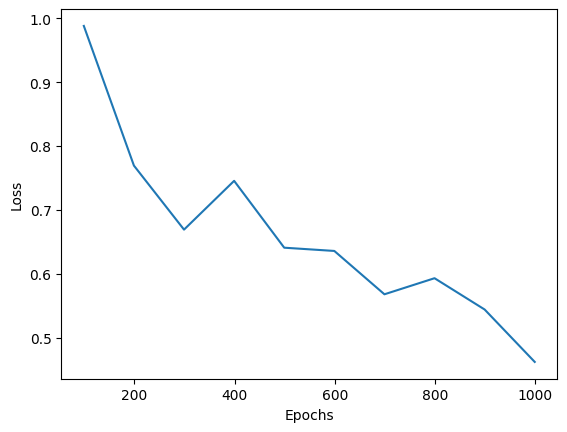

tensor([[-3.3918,  1.4222,  1.8715],
        [-4.0027,  1.6981,  2.3010],
        [-4.4587,  1.8907,  2.6281],
        [-2.5622,  1.0585,  1.2828],
        [-3.7766,  1.5956,  2.1421],
        [-1.9332,  0.7782,  0.8388],
        [-3.1548,  1.3206,  1.7022],
        [-2.3607,  0.9748,  1.1376],
        [-3.4244,  1.4418,  1.8920],
        [-4.2157,  1.7930,  2.4513],
        [-3.0439,  1.2753,  1.6218],
        [ 0.8554, -0.5039, -1.1108],
        [ 0.8554, -0.5039, -1.1108],
        [-1.3267,  0.5143,  0.4075],
        [ 0.8170, -0.4626, -1.0955],
        [-3.2311,  1.3521,  1.7573],
        [ 0.8359, -0.4829, -1.1030],
        [-3.3310,  1.3994,  1.8264],
        [ 0.8554, -0.5039, -1.1108],
        [ 0.8294, -0.4760, -1.1004],
        [-1.6992,  0.6749,  0.6731],
        [-3.9827,  1.6890,  2.2869],
        [ 0.8357, -0.4826, -1.1029],
        [ 0.8554, -0.5039, -1.1108],
        [-1.4769,  0.5818,  0.5133],
        [-2.0846,  0.8393,  0.9487],
        [-2.6061,  1.0799,  1.3130],
 

In [ ]:
class DNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(4, 6)
    self.act1 = nn.ReLU()
    self.linear2 = nn.Linear(6, 4)
    self.act2 = nn.ReLU()
    self.linear3 = nn.Linear(4, 3)

  def forward(self, x):
    x = self.linear1(x)
    x = self.act1(x)
    x = self.linear2(x)
    x = self.act2(x)
    x = self.linear3(x)
    return x

lr = 0.001
model = DNN()
mse = torch.nn.CrossEntropyLoss()
opt_SGD = torch.optim.SGD(model.parameters(), lr = lr)
losses = []
epochs_lst = []
# Training step
def fit(num_epochs, model, loss_fn, opt, train_dl):
  for epoch in range(num_epochs):
    for xb, yb in train_dl:
      preds = model(xb)
      loss = loss_fn(preds, yb)
      loss.backward()
      opt.step()
      opt.zero_grad()
    if epoch%100 == 99:
      print(loss.item())
      losses.append(loss.item())
      epochs_lst.append(epoch)


def drawGraph(losses, epoches_lst):
  plt.plot(epochs_lst, losses)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.show()


fit(1000, model, mse, opt_SGD, train_dl)
drawGraph(losses, epochs_lst)
preds = model(X_test)
print(preds)

In [ ]:
preds_new = torch.argmax(preds, dim=1)
labels = {0: "setosa", 1: "versicolor", 2: "virginica"}
for i in range(preds_new.numel()):
  print(labels[preds_new[i].item()])

virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
virginica
setosa
setosa
virginica
setosa
virginica
setosa
virginica
setosa
setosa
virginica
virginica
setosa
setosa
virginica
virginica
virginica
virginica
setosa
virginica


In [ ]:
pd.DataFrame({'preds': preds_new.numpy(), 'labels': y_test.numpy()})

,preds,labels
0,2,2
1,2,2
2,2,2
3,2,1
4,2,2
5,2,1
6,2,2
7,2,1
8,2,2
9,2,2


# **CNN**

Convolution Process using numpy

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Function to perform convolution
def convolve2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape

    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1

    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            patch = image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(patch * kernel)

    return output


# Function to perform max pooling
def max_pooling(image, pool_size):
    pool_height, pool_width = pool_size
    image_height, image_width = image.shape

    output_height = image_height // pool_height
    output_width = image_width // pool_width

    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            patch = image[i*pool_height:(i+1)*pool_height, j*pool_width:(j+1)*pool_width]
            output[i, j] = np.max(patch)

    return output


Text(0.5, 1.0, 'Max Pooled Image')

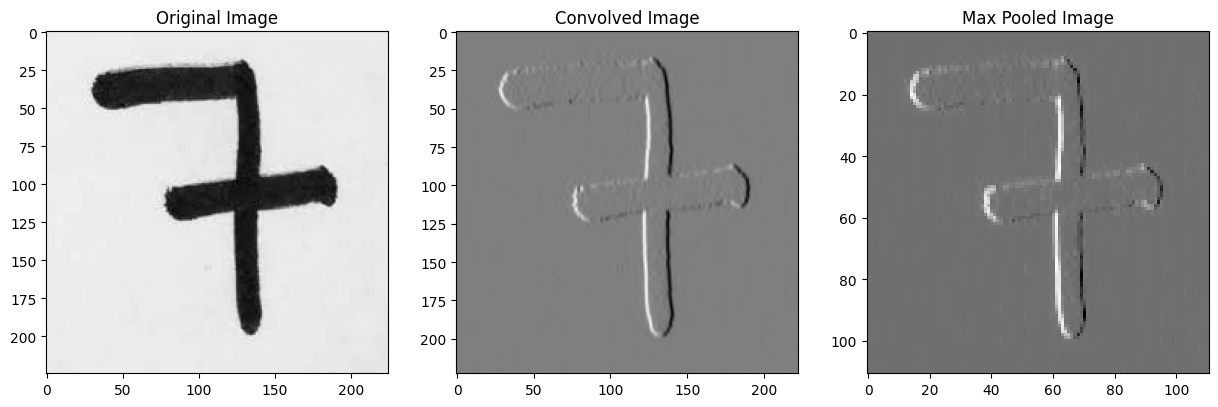

In [ ]:
image_path = r"/content/drive/MyDrive/Dataset/images.jpeg"
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = np.array(image)

# image = np.random.rand(5, 5)

# Define a kernel (e.g., edge detection)
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Apply convolution
convolved_image = convolve2d(image, kernel)

max_pooling_img = max_pooling(convolved_image, (2, 2))

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(convolved_image, cmap='gray')
axes[1].set_title('Convolved Image')
axes[2].imshow(max_pooling_img, cmap='gray')
axes[2].set_title('Max Pooled Image')

In [ ]:
image = np.random.rand(5, 5)
image

array([[0.09865053, 0.52521243, 0.36051894, 0.21917541, 0.96039324],
       [0.36312466, 0.20557749, 0.09425741, 0.21215107, 0.04927506],
       [0.7737655 , 0.10031832, 0.44264185, 0.97337431, 0.33021284],
       [0.11717513, 0.63664965, 0.31029961, 0.4635026 , 0.76889252],
       [0.45942061, 0.89752827, 0.7664678 , 0.72507998, 0.83271031]])

Convolution and Pooling using Pytorch

Input Image Shape: torch.Size([1, 1, 225, 225])


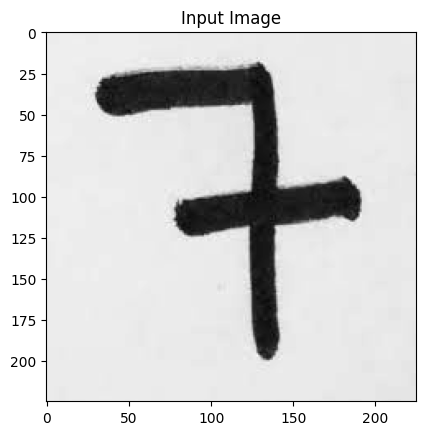

Input Image Shape: torch.Size([1, 1, 225, 225])


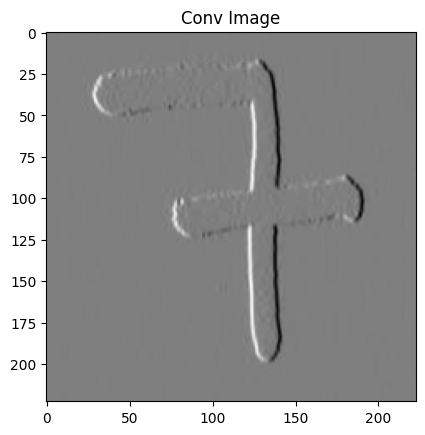

Conv Image Shape: torch.Size([1, 1, 223, 223])


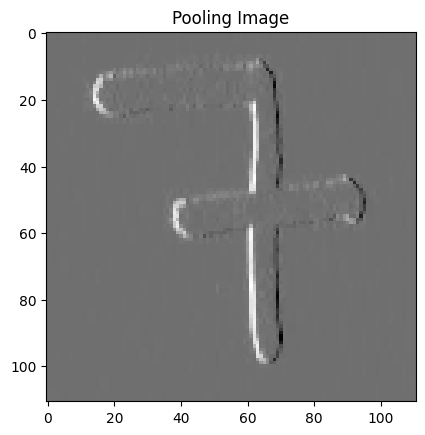

Pooling Image Shape: torch.Size([1, 1, 111, 111])


In [ ]:
import torch
import torch.nn as nn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
def load_image(image_path, image_size=(128, 128)):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    # image = image.resize(image_size)             # Resize the image
    image = np.array(image)                      # Convert to numpy array
    image = torch.tensor(image, dtype=torch.float32)  # Convert to torch tensor
    image = image.unsqueeze(0).unsqueeze(0)      # Add batch and channel dimensions
    return image

# Path to the image
image_path = r"/content/drive/MyDrive/Dataset/images.jpeg"

# Load the image
input_image = load_image(image_path)
print("Input Image Shape:", input_image.shape)

# Define a convolutional layer
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0)

# Set a specific filter for the convolutional layer
conv_layer.weight = nn.Parameter(torch.tensor([[[[1, 0, -1],
                                                 [1, 0, -1],
                                                 [1, 0, -1]]]], dtype=torch.float32))

# Perform convolution
conv_output = conv_layer(input_image)
max_pooling_layer = nn.MaxPool2d(kernel_size=2, stride=2)
max_pooling_img = max_pooling_layer(conv_output)

# Display the image
plt.imshow(input_image[0, 0].numpy(), cmap='gray')
plt.title("Input Image")
plt.show()
print("Input Image Shape:", input_image.shape)

# Display the image
plt.imshow(conv_output[0, 0].detach().numpy(), cmap='gray')
plt.title("Conv Image")
plt.show()
print("Conv Image Shape:", conv_output.shape)

# Display the image
plt.imshow(max_pooling_img[0, 0].detach().numpy(), cmap='gray')
plt.title("Pooling Image")
plt.show()
print("Pooling Image Shape:", max_pooling_img.shape)

# CNN for **Brain** Tumor Detection Using Pytorch

In [ ]:
!pip install split-folders

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
import torch
from PIL import Image
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
from torchvision.datasets import ImageFolder
from torchsummary import summary
import splitfolders
import torch.nn.functional as F
import pathlib
from torch import optim

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Step 2: Specify the path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/Brain Tumor Data Set.zip'
extract_dir = '/content/drive/MyDrive/Brain Tumor Data Set'

# Ensure the extract directory exists
os.makedirs(extract_dir, exist_ok=True)

# Step 3: Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
os.listdir("/content/drive/MyDrive/Brain Tumor Data Set/Brain Tumor Data Set")

['Brain Tumor', 'Healthy']

In [ ]:
data_dir = "/content/drive/MyDrive/Brain Tumor Data Set/Brain Tumor Data Set"
data_dir = pathlib.Path(data_dir)

splitfolders.ratio(data_dir, output='brain', seed=41, ratio=(0.8, 0.2))

Copying files: 4600 files [02:45, 27.82 files/s] 


In [ ]:
data_dir = "/content/brain"
data_dir = pathlib.Path(data_dir)

In [ ]:
transform = transforms.Compose(
    [
        transforms.Resize((128,128)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomRotation(30),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]
)

In [ ]:
train_set = torchvision.datasets.ImageFolder(data_dir.joinpath('train'), transform=transform)
train_set.transform
val_set = torchvision.datasets.ImageFolder(data_dir.joinpath('val'), transform=transform)
val_set.transform

Compose(
    Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [ ]:
print(train_set)

Dataset ImageFolder
    Number of datapoints: 3679
    Root location: /content/brain/train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


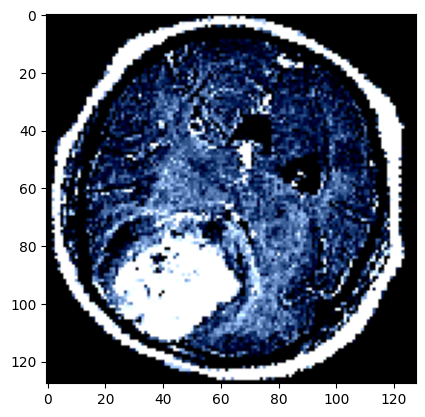

In [ ]:
img, label = train_set[1000]
plt.imshow(img.permute(1,2,0))

In [ ]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)

In [ ]:
next(iter(val_loader))[0].shape

torch.Size([64, 3, 128, 128])

In [ ]:
class CNNModel(nn.Module):
  def __init__(self):
    super(CNNModel, self).__init__()

    #Conv 1
    self.cnv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0) #128-5+1=124

    #Max Pool 1
    self.maxpool1 = nn.MaxPool2d(kernel_size=2) #124/2 = 64

    #Conv 2
    self.cnv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0) #60

    #Max Pool 2
    self.maxpool2 = nn.MaxPool2d(kernel_size=2) #30

    #Conv 3
    self.cnv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=0) #26

    #Max Pool 3
    self.maxpool3 = nn.MaxPool2d(kernel_size=2) #13

    #Conv 4
    self.cnv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=0) #9

    #Max Pool 4
    self.maxpool4 = nn.MaxPool2d(kernel_size=2) #4

    #Activation Function
    self.leakyRelu = nn.LeakyReLU()

    #Fully connected Layer 1
    self.fc1 = nn.Linear(128*4*4, 1024)

    #Fully connected Layer 2
    self.fc2 = nn.Linear(1024, 2)

  def forward(self, x):
    #Layer 1
    out = self.leakyRelu(self.cnv1(x))
    out = self.maxpool1(out)

    #Layer 2
    out = self.leakyRelu(self.cnv2(out))
    out = self.maxpool2(out)

    #Layer 3
    out = self.leakyRelu(self.cnv3(out))
    out = self.maxpool3(out)

    #Layer 4
    out = self.leakyRelu(self.cnv4(out))
    out = self.maxpool4(out)

    #flatten
    out = out.view(out.size(0), -1)

    # Linear Function
    out = self.leakyRelu(self.fc1(out))
    out = self.fc2(out)

    return out



In [ ]:
# Training CNN
num_epochs = 10
model = CNNModel()
error = nn.CrossEntropyLoss()

lr = 0.001
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

In [ ]:
train_loss_list = []
val_loss_list = []
accuracy_list = []

for epoch in range(num_epochs):
  train_loss = 0
  val_loss = 0
  for i, (images, labels) in enumerate(train_loader):

    optimizer.zero_grad()
    outputs = model(images)
    loss = error(outputs, labels)
    train_loss+=loss.item()
    loss.backward()
    optimizer.step()
    print("Loss in Iteration:", i, ":", loss.item())
  total = 0
  correct = 0
  for images, labels in val_loader:
    outputs = model(images)
    v_loss = error(outputs, labels)
    val_loss+=v_loss.item()
    predicted = torch.max(outputs.data, 1)[1]

    total+=len(labels)
    correct+=(predicted==labels).sum()


  scheduler.step(val_loss/len(val_loader))
  accuracy = 100*correct/float(total)
  train_loss_list.append(train_loss/len(train_loader))
  val_loss_list.append(val_loss/len(val_loader))
  accuracy_list.append(accuracy)
  print("Epoch:{}  Loss:{}  Acciracy:{}%".format(epoch, train_loss/len(train_loader), accuracy))

Loss in Iteration: 0 : 0.6927366852760315
Loss in Iteration: 1 : 0.8313121199607849
Loss in Iteration: 2 : 0.6774230599403381
Loss in Iteration: 3 : 0.7577914595603943
Loss in Iteration: 4 : 0.6948931217193604
Loss in Iteration: 5 : 0.6902090907096863
Loss in Iteration: 6 : 0.6956904530525208
Loss in Iteration: 7 : 0.6877793669700623
Loss in Iteration: 8 : 0.687325656414032
Loss in Iteration: 9 : 0.6973744034767151
Loss in Iteration: 10 : 0.6915191411972046
Loss in Iteration: 11 : 0.686689019203186
Loss in Iteration: 12 : 0.6965746283531189
Loss in Iteration: 13 : 0.6769287586212158
Loss in Iteration: 14 : 0.6737024784088135
Loss in Iteration: 15 : 0.6754982471466064
Loss in Iteration: 16 : 0.7028927206993103
Loss in Iteration: 17 : 0.6235804557800293
Loss in Iteration: 18 : 0.678848385810852
Loss in Iteration: 19 : 0.7503587007522583
Loss in Iteration: 20 : 0.6824415922164917
Loss in Iteration: 21 : 0.6874995827674866
Loss in Iteration: 22 : 0.6944111585617065
Loss in Iteration: 23 : 

In [ ]:
train_loss_list

[0.6747854146464117,
 0.5676144926712431,
 0.444984317853533,
 0.3937813665332465,
 0.3264911544734034,
 0.26912943325166044,
 0.23238347457914516,
 0.1877376422414492,
 0.15893379977807917,
 0.14081322318264122]

In [ ]:
val_loss_list

[0.6070284644762675,
 0.46723085443178813,
 0.3609366854031881,
 0.3641016085942586,
 0.2640925168991089,
 0.23033503592014312,
 0.1782901038726171,
 0.16362027277549107,
 0.1394489491979281,
 0.12132417112588882]

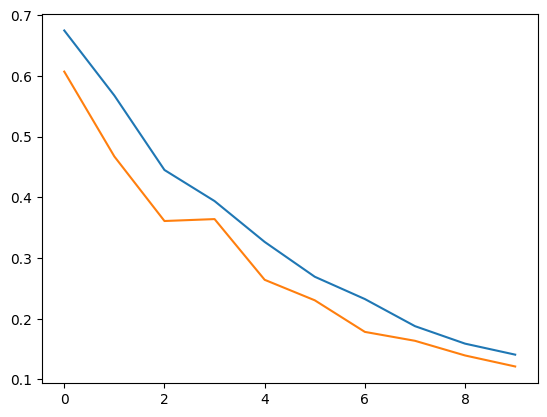

In [ ]:
plt.plot(range(num_epochs), train_loss_list)
plt.plot(range(num_epochs), val_loss_list)

In [ ]:
accuracy_list

[tensor(73.0727),
 tensor(79.1531),
 tensor(84.2562),
 tensor(83.9305),
 tensor(90.8795),
 tensor(90.5537),
 tensor(93.8111),
 tensor(93.8111),
 tensor(95.5483),
 tensor(96.3084)]

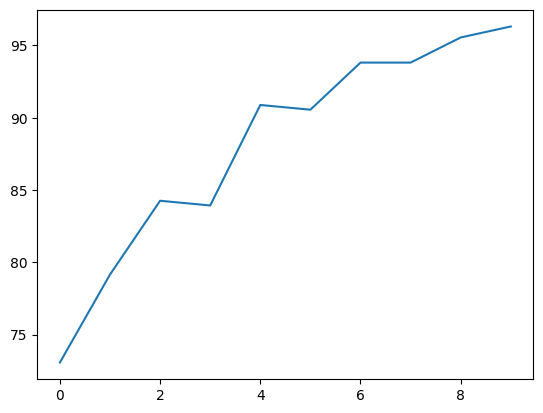

In [ ]:
plt.plot(range(num_epochs), accuracy_list)

Text(0.5, 1.0, '0')

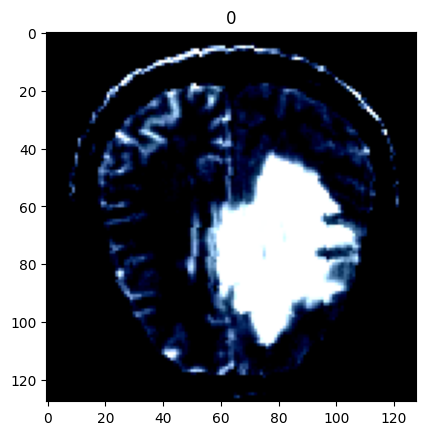

In [ ]:
img, label = val_set[500]
plt.imshow(img.permute(1,2,0))
plt.title(label)

In [ ]:
image = img.unsqueeze(0)

with torch.no_grad():
  output = model(image)

_, pred = torch.max(output, 1)
print("Predicted Output:", pred.item())

Predicted Output: 0
